# Extracción ADT
### Script para extraer una sección de los datos de Aviso y guardarlos en un archivo netCDF

In [56]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import dask as dk

from dask.distributed import Client
from os import listdir
from os.path import isfile, join, getsize
import glob

In [57]:
xr.set_options(keep_attrs=True);

In [58]:
client = Client(n_workers=24, threads_per_worker=2, memory_limit=12e9)
client

/home/pvb/miniconda3/lib/python3.8/site-packages/distributed/node.py:151: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 39097 instead
  warnings.warn(


Client Scheduler: tcp://127.0.0.1:46219 Dashboard: http://127.0.0.1:39097/status,Cluster Workers: 24 Cores: 48 Memory: 288.00 GB


## Read all files

In [59]:
ficheros=[]
for ianho in range(1993,2020):
    for imes in range(1,13):
        base_dir='/data/shareddata/Satelite/dataset-duacs-rep-global-merged-allsat-phy-l4/{}/{:02d}/dt_global_allsat_phy_l4_{}{:02d}*'.format(ianho,imes,ianho,imes)
        fichero=sorted(glob.glob(base_dir)) 
        for ifile in fichero:
            ficheros.append(ifile)
        #onlyfiles = [f for f in listdir(base_dir) if isfile(join(base_dir, f))]
        #ficheros.extend(onlyfiles)

## Load files

In [60]:
time_freq='1'

In [62]:
dsALL = xr.open_mfdataset(ficheros[::int(freq)])

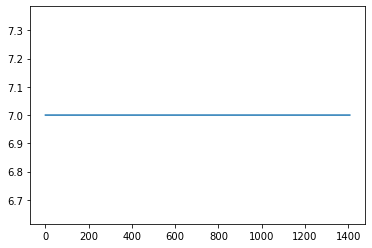

In [47]:
plt.plot(np.diff(dsALL.time)/86400/1e9)

In [48]:
dsALL.longitude

<xarray.DataArray 'longitude' (longitude: 1440)>
array([1.25000e-01, 3.75000e-01, 6.25000e-01, ..., 3.59375e+02, 3.59625e+02,
       3.59875e+02], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 0.125 0.375 0.625 0.875 ... 359.4 359.6 359.9
Attributes:
    axis:           X
    bounds:         lon_bnds
    long_name:      Longitude
    standard_name:  longitude
    units:          degrees_east
    valid_max:      359.875
    valid_min:      0.125

In [49]:
#Select area
area_name='NorthAtlantic'
lat_area=slice(0,60)
lon_area=slice(270,360)

In [50]:
sla_area = dsALL.sla.sel(latitude=lat_area, longitude=lon_area)

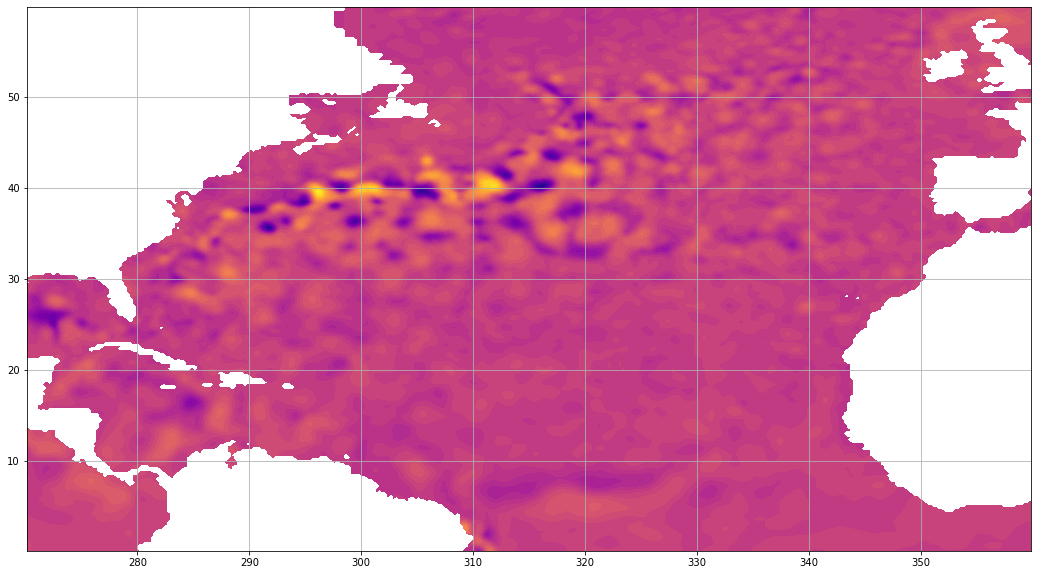

In [51]:
fig, ax= plt.subplots(figsize=(18,10))
ax.contourf(sla_area.longitude,sla_area.latitude,sla_area.isel(time=0),40,cmap='plasma')
ax.grid()

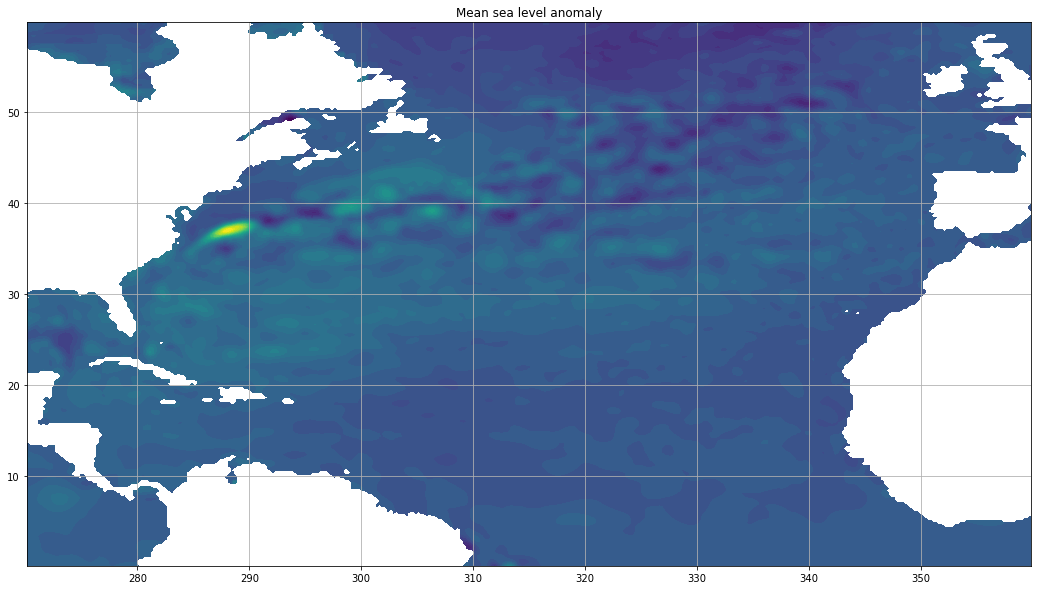

In [52]:
fig, ax= plt.subplots(figsize=(18,10))
ax.contourf(sla_area.longitude,sla_area.latitude,sla_area.mean(dim='time'),40,cmap='viridis')
ax.set_title('Mean sea level anomaly')
ax.grid()


## Load in memory

In [53]:
sla_area.load()

<xarray.DataArray 'sla' (time: 1409, latitude: 240, longitude: 360)>
array([[[ 0.0403,  0.0379,  0.036 , ..., -0.0291, -0.0293, -0.0284],
        [ 0.0434,  0.0399,  0.037 , ..., -0.0268, -0.0273, -0.0269],
        [ 0.045 ,  0.0411,  0.0382, ..., -0.0261, -0.0267, -0.0268],
        ...,
        [    nan,     nan,     nan, ...,  0.0768,  0.0889,  0.096 ],
        [    nan,     nan,     nan, ...,  0.0628,  0.0726,  0.0815],
        [    nan,     nan,     nan, ...,  0.0505,  0.0533,  0.059 ]],

       [[ 0.0344,  0.0323,  0.0318, ..., -0.0099, -0.0104, -0.0111],
        [ 0.0359,  0.0347,  0.0351, ..., -0.0114, -0.011 , -0.0112],
        [ 0.0377,  0.0365,  0.0373, ..., -0.0148, -0.0131, -0.0124],
        ...,
        [    nan,     nan,     nan, ...,  0.2012,  0.218 ,  0.2317],
        [    nan,     nan,     nan, ...,  0.1996,  0.2213,  0.239 ],
        [    nan,     nan,     nan, ...,  0.2042,  0.2295,  0.2509]],

       [[ 0.0285,  0.0268,  0.0248, ...,  0.011 ,  0.0106,  0.009 ],
        [ 0.033 ,  0.0319,  0.0303, ...,  0.0088,  0.0083,  0.0068],
        [ 0.0391,  0.0378,  0.0359, ...,  0.0051,  0.0039,  0.0024],
        ...,
...
        ...,
        [ 0.0264,  0.0306,  0.0407, ...,  0.0828,  0.076 ,  0.0672],
        [ 0.0263,  0.0319,  0.0458, ...,  0.0764,  0.0714,  0.0647],
        [ 0.0261,  0.0324,  0.0478, ...,  0.0893,  0.0868,  0.0816]],

       [[ 0.0801,  0.0805,  0.0832, ...,  0.1323,  0.1299,  0.1273],
        [ 0.0815,  0.0824,  0.0852, ...,  0.1332,  0.1312,  0.1289],
        [ 0.0828,  0.0843,  0.0867, ...,  0.1337,  0.1327,  0.1311],
        ...,
        [    nan,     nan,     nan, ...,  0.0974,  0.0715,  0.0502],
        [    nan,     nan,     nan, ...,  0.0834,  0.0603,  0.0392],
        [    nan,     nan,     nan, ...,  0.0798,  0.0619,  0.0442]],

       [[ 0.1204,  0.1221,  0.1235, ...,  0.1175,  0.1193,  0.1205],
        [ 0.1262,  0.1285,  0.1297, ...,  0.1101,  0.1114,  0.1126],
        [ 0.1293,  0.1317,  0.132 , ...,  0.1041,  0.1049,  0.1061],
        ...,
        [    nan,     nan,     nan, ...,  0.1464,  0.1408,  0.1397],
        [    nan,     nan,     nan, ...,  0.1442,  0.1412,  0.1403],
        [    nan,     nan,     nan, ...,  0.1453,  0.1457,  0.1464]]])
Coordinates:
  * time       (time) datetime64[ns] 1993-01-01 1993-01-08 ... 2019-12-27
  * latitude   (latitude) float32 0.125 0.375 0.625 0.875 ... 59.38 59.62 59.88
  * longitude  (longitude) float32 270.1 270.4 270.6 270.9 ... 359.4 359.6 359.9
Attributes:
    comment:        The sea level anomaly is the sea surface height above mea...
    grid_mapping:   crs
    long_name:      Sea level anomaly
    standard_name:  sea_surface_height_above_sea_level
    units:          m

In [54]:
file_out='sla_'+area_name+time_code+'.nc'

In [55]:
sla_area.to_netcdf(file_out)